## Lab 6 Multivariable data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

import itertools
import time
import statsmodels.api as sm

%matplotlib inline

In [2]:
import urllib.request 
# urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", "iris.csv")

df_mydata = pd.read_csv('NewSeoulBikeData.csv')
df_mydata = df_mydata[df_mydata['Hour']>=11]
df_mydata = df_mydata[df_mydata['Hour']<=15]

# View the type
type(df_mydata)

# # Specify the column names that you want to use as features in this model.
headers =  ["Count","Hour","Temperature","Humidity","Seasons"]
df_mydata.columns = headers

# If your data set is large, this the "head()" function let's you view the first few entries to see what's inside.
df_mydata.head()

,Count,Hour,Temperature,Humidity,Seasons
11,360,11,-0.5,21,Winter
12,449,12,1.7,23,Winter
13,451,13,2.4,25,Winter
14,447,14,3.0,26,Winter
15,463,15,2.1,36,Winter


### Ridge Regression

First, ensure that the missing values have been removed from the data. For this dataset, we do not have missing data.

In [3]:
df = df_mydata.dropna().drop('Seasons', axis = 1)
df.info()
dummies = pd.get_dummies(df[['Hour', 'Temperature', 'Humidity']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 11 to 8751
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Count        1825 non-null   int64  
 1   Hour         1825 non-null   int64  
 2   Temperature  1825 non-null   float64
 3   Humidity     1825 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 71.3 KB


We will now perform ridge regression and the lasso in order to predict rented bike count on the weather data. Let's set up our data

In [4]:
y = df.Count

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Count', 'Hour', 'Temperature', 'Humidity'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['Hour', 'Temperature', 'Humidity']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 11 to 8751
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hour         1825 non-null   int64  
 1   Temperature  1825 non-null   float64
 2   Humidity     1825 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 57.0 KB


We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [5]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [6]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pip

(100, 3)

Text(0, 0.5, 'weights')

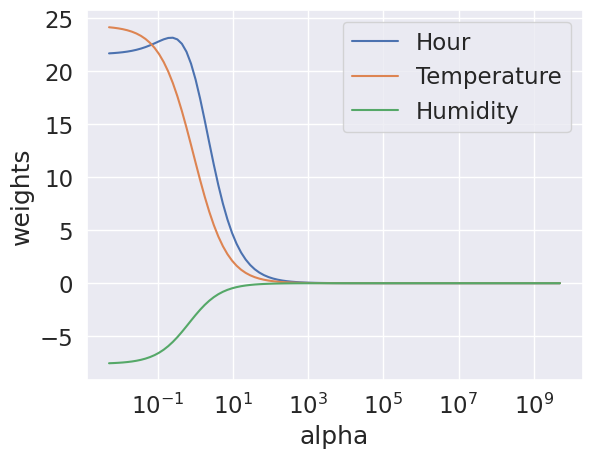

In [17]:
import seaborn as sns
ax = plt.gca()
lines = ax.plot(alphas, coefs)
ax.set_xscale('log')
# sns.set(font_scale=1.5) # Adjust to fit
# sns.heatmap(cnf_matrix, annot=True, ax=ax, cmap="Blues", fmt="g");
# lines.tick_params(axis='both', which='major', labelsize=5)  # Adjust to fit
plt.legend(lines, ['Hour', 'Temperature', 'Humidity'])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

In [ ]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

In [ ]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

In [ ]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

In [ ]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

In [ ]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

### The Lasso

In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

In [ ]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Ridge regression, is a regression technique used to lighten the problem of multicollinearity in linear regression models. Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, leading to unstable estimates of regression coefficients. In ridge regression, a penalty term is added to the standard linear regression objective function, which penalizes large values of the regression coefficients.

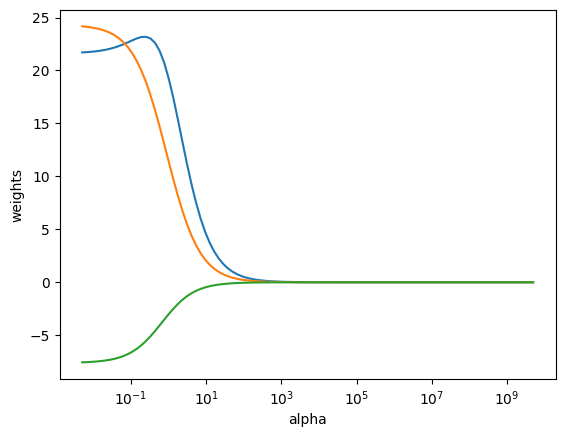

For the above graph, the ridge regression will penalize the coefficients, such that those that are the least effective in our estimation will "shrink" the fastest. The faster a coefficient is shrinking the less important it is in prediction. From the graph, it seems that the most important variable is represented by the orange line, and second most important by the blue line. That's because initially, when the penalty for having high coefficient values is low, they are both quite high. In contrast, the green line is the least important because its influence (coefficient) remains close to zero regardless of the penalty.